## Sales Analysis


#### Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime

#### Task #1 Merging 12months of sales data into a single csv file

In [2]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

# Python method listdir() returns a list containing the names of the entries in the directory given by path
files = os.listdir("./Sales_Data")
files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [3]:
all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv("all_data.csv", index=False)

#### Read in updated file

In [4]:
all_data = pd.read_csv("all_data.csv", parse_dates=['Order Date'])
all_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176558,USB-C Charging Cable,2,11.95,04/19/2019 08:46,"917 1st St, Dallas, TX 75001"
3,NaN,NaN,NaN,NaN,NaN,NaN
4,176559,Bose SoundSport Headphones,1,99.99,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215"
5,176560,Google Phone,1,600,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
6,176560,Wired Headphones,1,11.99,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
7,176561,Wired Headphones,1,11.99,04/30/2019 09:27,"333 8th St, Los Angeles, CA 90001"
8,176562,USB-C Charging Cable,1,11.95,04/29/2019 13:03,"381 Wilson St, San Francisco, CA 94016"
9,176563,Bose SoundSport Headphones,1,99.99,04/02/2019 07:46,"668 Center St, Seattle, WA 98101"


In [5]:
all_data.shape

(186852, 6)

In [6]:
all_data['Order Date']

0                      NaN
1                      NaN
2         04/19/2019 08:46
3                      NaN
4         04/07/2019 22:30
                ...       
186847    09/17/2019 20:56
186848    09/01/2019 16:00
186849    09/23/2019 07:39
186850    09/19/2019 17:30
186851    09/30/2019 00:18
Name: Order Date, Length: 186852, dtype: object

In [7]:
all_data.dropna(axis=0, how='all', inplace=True)

In [8]:
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [9]:
all_data.shape

(186305, 6)

### Augment data with additional columns

#### Task #2 Add Month Column

In [ ]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data.reset_index(drop=True, inplace=True) # delete the old index

In [8]:
# generate a new column where displays the month
all_data['Month'] = all_data['Order Date'].str.split("/", n = 1, expand = True)[0]

In [9]:
# change the data type from string to integer
all_data['Month'] = all_data['Month'].astype('int32')

ValueError: invalid literal for int() with base 10: 'Order Date'

#### Find ‘Order Date’ and delete them

In [10]:
# based on the above error, locate the error
all_data.loc[all_data['Order Date'] == 'Order Date']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
521,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
1151,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
1157,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
2880,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
2895,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
...,...,...,...,...,...,...,...
185166,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
185553,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
186565,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
186634,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date


In [11]:
# select only the columns with no string value
all_data = all_data.loc[all_data['Order Date'] != 'Order Date']

In [12]:
# change the data type from string to integer
all_data['Month'] = all_data['Month'].astype('int32')

In [13]:
all_data['Month'].dtype

dtype('int32')

#### Add a sales column

In [14]:
# convert string data type to number data type
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [15]:
# calculate the total sales
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
2,176558,USB-C Charging Cable,2,11.95,04/19/2019 08:46,"917 1st St, Dallas, TX 75001",4,23.90
4,176559,Bose SoundSport Headphones,1,99.99,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
5,176560,Google Phone,1,600.00,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
6,176560,Wired Headphones,1,11.99,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
7,176561,Wired Headphones,1,11.99,04/30/2019 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186847,259353,AAA Batteries (4-pack),3,2.99,09/17/2019 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
186848,259354,iPhone,1,700.00,09/01/2019 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186849,259355,iPhone,1,700.00,09/23/2019 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
186850,259356,34in Ultrawide Monitor,1,379.99,09/19/2019 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


#### Question 1: What was the best month for sales? How much was earned that month?

In [24]:
# sales group by month
sales_by_month = pd.DataFrame(all_data.groupby('Month')['Sales'].sum())
sales_by_month

,Sales
Month,
1,1.822257e+06
2,2.202022e+06
3,2.807100e+06
4,3.390670e+06
5,3.152607e+06
6,2.577802e+06
7,2.647776e+06
8,2.244468e+06
9,2.097560e+06


In [25]:
# find the corresponding month
max_sales_mon = sales_by_month['Sales'].idxmax()
max_sales_mon

12

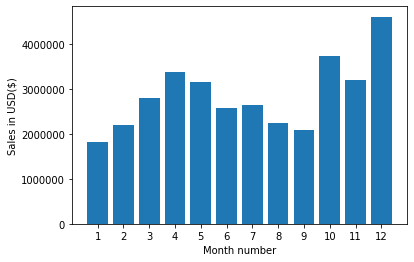

In [18]:
# make a plot

months = range(1,13)

plt.bar(months, sales_by_month['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD($)')
plt.xlabel('Month number')
plt.show()

#### Question 2: What US city had the highest number of sales?

In [19]:
# generate a new column where displays the city
all_data['City'] = all_data['Purchase Address'].str.split(", ", n = 2, expand = True)[1]
all_data['City']

2                Dallas
4                Boston
5           Los Angeles
6           Los Angeles
7           Los Angeles
              ...      
186847      Los Angeles
186848    San Francisco
186849    San Francisco
186850    San Francisco
186851    San Francisco
Name: City, Length: 185950, dtype: object

In [20]:
all_data['State'] = all_data['Purchase Address'].str.split(", ", n = 2, expand = True)[2].str[0:2]
all_data['State']

2         TX
4         MA
5         CA
6         CA
7         CA
          ..
186847    CA
186848    CA
186849    CA
186850    CA
186851    CA
Name: State, Length: 185950, dtype: object

#### Add a city column

In [21]:
all_data['City'] = all_data['City'] + ' ' + '(' + all_data['State'] + ')'
all_data.drop(['State'], axis=1, inplace=True)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
2,176558,USB-C Charging Cable,2,11.95,04/19/2019 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
4,176559,Bose SoundSport Headphones,1,99.99,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
5,176560,Google Phone,1,600.00,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
6,176560,Wired Headphones,1,11.99,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
7,176561,Wired Headphones,1,11.99,04/30/2019 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [22]:
# sales group by city
sales_by_city = pd.DataFrame(all_data.groupby('City')['Sales'].sum())
sales_by_city

,Sales
City,
Atlanta (GA),2.795499e+06
Austin (TX),1.819582e+06
Boston (MA),3.661642e+06
Dallas (TX),2.767975e+06
Los Angeles (CA),5.452571e+06
New York City (NY),4.664317e+06
Portland (ME),4.497583e+05
Portland (OR),1.870732e+06
San Francisco (CA),8.262204e+06


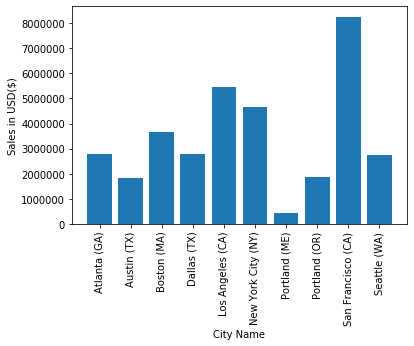

In [26]:
# make a plot

cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, sales_by_city['Sales'])
plt.xticks(cities, rotation='vertical')
plt.ylabel('Sales in USD($)')
plt.xlabel('City Name')
plt.show()

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [27]:
all_data.drop(['Purchase Address'], axis=1, inplace=True) # drop the address column for now, cuz we dont need it

In [28]:
# convert column [Order Date] to date time format
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [29]:
# create new columns of Hour and Minute
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Month,Sales,City,Hour,Minute
2,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,4,23.90,Dallas (TX),8,46
4,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,4,99.99,Boston (MA),22,30
5,176560,Google Phone,1,600.00,2019-04-12 14:38:00,4,600.00,Los Angeles (CA),14,38
6,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,4,11.99,Los Angeles (CA),14,38
7,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,4,11.99,Los Angeles (CA),9,27
...,...,...,...,...,...,...,...,...,...,...
186847,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,9,8.97,Los Angeles (CA),20,56
186848,259354,iPhone,1,700.00,2019-09-01 16:00:00,9,700.00,San Francisco (CA),16,0
186849,259355,iPhone,1,700.00,2019-09-23 07:39:00,9,700.00,San Francisco (CA),7,39
186850,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,9,379.99,San Francisco (CA),17,30


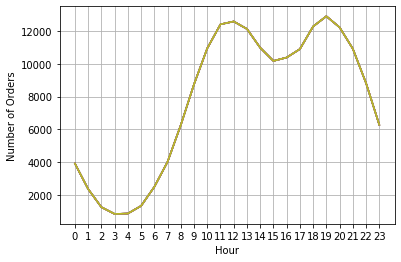

In [30]:
# make a line plot

hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count()) # for each hour, count how many orders were placed
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()


In [31]:
# sales group by hour
sales_by_hour = pd.DataFrame(all_data.groupby('Hour')['Sales'].sum())
sales_by_hour

,Sales
Hour,
0,713721.27
1,460866.88
2,234851.44
3,145757.89
4,162661.01
5,230679.82
6,448113.00
7,744854.12
8,1192348.97


#### Question 4: What products are most often sold together?

In [52]:
all_data['Order ID'].duplicated(keep=False)

2         False
4         False
5          True
6          True
7         False
          ...  
186847    False
186848    False
186849    False
186850    False
186851    False
Name: Order ID, Length: 185950, dtype: bool

In [33]:
all_data[all_data['Order ID'].duplicated(keep=False)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Month,Sales,City,Hour,Minute
5,176560,Google Phone,1,600.00,2019-04-12 14:38:00,4,600.00,Los Angeles (CA),14,38
6,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,4,11.99,Los Angeles (CA),14,38
20,176574,Google Phone,1,600.00,2019-04-03 19:42:00,4,600.00,Los Angeles (CA),19,42
21,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,4,11.95,Los Angeles (CA),19,42
32,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,4,99.99,Boston (MA),11,31
...,...,...,...,...,...,...,...,...,...,...
186794,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,9,3.84,Atlanta (GA),20,18
186805,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,9,11.99,Atlanta (GA),0,25
186806,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,9,5.98,Atlanta (GA),0,25
186843,259350,Google Phone,1,600.00,2019-09-30 13:49:00,9,600.00,San Francisco (CA),13,49


In [53]:
temp_df = all_data[all_data['Order ID'].duplicated(keep=False)] # press both 'shift' + 'tab' to check the syntax

temp_df['Grouped'] = temp_df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x)) 
#The join() method takes all items in an iterable and joins them into one string

temp_df = temp_df[['Order ID', 'Grouped']].drop_duplicates()

temp_df

C:\Users\Elvis\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Order ID,Grouped
5,176560,"Google Phone, Wired Headphones"
20,176574,"Google Phone, USB-C Charging Cable"
32,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
34,176586,"AAA Batteries (4-pack), Google Phone"
121,176672,"Lightning Charging Cable, USB-C Charging Cable"
...,...,...
186783,259296,"Apple Airpods Headphones, Apple Airpods Headph..."
186785,259297,"iPhone, Lightning Charging Cable, Lightning Ch..."
186793,259303,"34in Ultrawide Monitor, AA Batteries (4-pack)"
186805,259314,"Wired Headphones, AAA Batteries (4-pack)"


In [34]:
# mport some new libraries
from itertools import combinations
from collections import Counter

In [35]:
count = Counter()

for row in temp_df['Grouped']:
    row_list = row.split(', ')
    count.update(Counter(combinations(row_list, 2)))

# the most 15 popular combinations
count.most_common(20)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92),
 (('Lightning Charging Cable', 'Apple Airpods Headphones'), 81),
 (('Vareebadd Phone', 'Bose SoundSport Headphones'), 80),
 (('USB-C Charging Cable', 'Bose SoundSport Headphones'), 77),
 (('Apple Airpods Headphones', 'Wired Headphones'), 69),
 (('Lightning Charging Cable', 'USB-C Charging Cable'), 58),
 (('Lightning Charging Cable', 'AA Batteries (4-pack)'), 55),
 (('Lightning Charging Cable', 'Lightning Charging Cable'), 54),
 (('Bose SoundSport Headphones', 'Wired Headphones'), 53),
 (('AA B

#### Question 5: What product sold the most? Why do you think it sold the most?

In [36]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Month,Sales,City,Hour,Minute
2,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,4,23.90,Dallas (TX),8,46
4,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,4,99.99,Boston (MA),22,30
5,176560,Google Phone,1,600.00,2019-04-12 14:38:00,4,600.00,Los Angeles (CA),14,38
6,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,4,11.99,Los Angeles (CA),14,38
7,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,4,11.99,Los Angeles (CA),9,27


In [49]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group['Quantity Ordered'].sum()
quantity_ordered

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

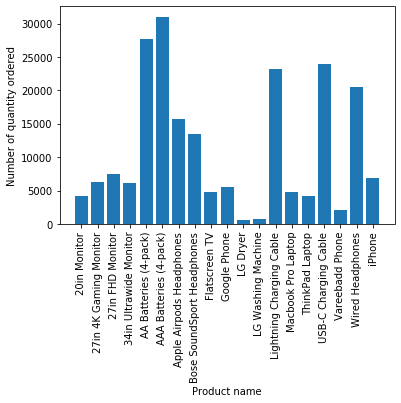

In [39]:
#make a plot

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.xticks(products, rotation='vertical')
plt.xlabel('Product name')
plt.ylabel('Number of quantity ordered')
plt.show()

In [44]:
prices = all_data.groupby('Product')['Price Each'].mean()
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

C:\Users\Elvis\anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


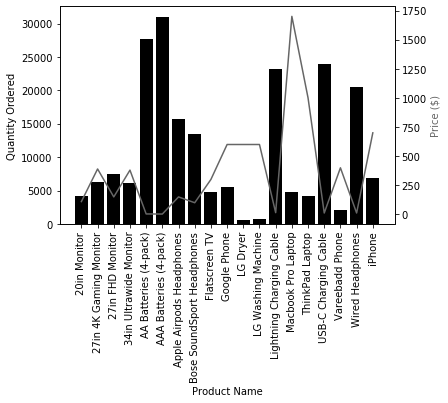

In [45]:
# make an overlap plot
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='k')
ax2.plot(products, prices, color='0.4')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='k')
ax2.set_ylabel('Price ($)', color='0.4')
ax1.set_xticklabels(products, rotation='vertical')

fig.show()